# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_dictionary_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print('--- Beginning Data Retrieval ---')

counter = 1

for city in cities:
    print(f"Processing city #{counter} | {city}")
    counter += 1
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    # weather_data is the dictionary
    request_data = requests.get(query_url)
    time.sleep(1)
    
    if request_data.status_code == 404:
        print('City not found', city)
    else:
        weather_data = request_data.json()

        weather_dict = {
            'City': weather_data['name'],
            'Cloudiness': weather_data['clouds']['all'],
            'Country': weather_data['sys']['country'],
            'Date': weather_data['dt'],
            'Humidity': weather_data['main']['humidity'],
            'Lat': weather_data['coord']['lat'],
            'Lng': weather_data['coord']['lon'],
            'Max Temp': weather_data['main']['temp_max'],
            'Wind Speed': weather_data['wind']['speed']
        }

        # Add each dictionary to our empty list, one at a time
        city_dictionary_list.append(weather_dict)
    
print('--- Data Retrieval Complete ---')


--- Beginning Data Retrieval ---
Processing city #1 | rikitea
Processing city #2 | tasiilaq
Processing city #3 | mataura
Processing city #4 | jalu
Processing city #5 | hobart
Processing city #6 | le mars
Processing city #7 | bluff
Processing city #8 | airai
Processing city #9 | butaritari
Processing city #10 | busselton
Processing city #11 | zhangye
Processing city #12 | illoqqortoormiut
City not found illoqqortoormiut
Processing city #13 | ushuaia
Processing city #14 | barentsburg
City not found barentsburg
Processing city #15 | caravelas
Processing city #16 | port elizabeth
Processing city #17 | new norfolk
Processing city #18 | hermanus
Processing city #19 | ribeira grande
Processing city #20 | belushya guba
City not found belushya guba
Processing city #21 | nantucket
Processing city #22 | aller
Processing city #23 | montepuez
Processing city #24 | tsihombe
City not found tsihombe
Processing city #25 | dubbo
Processing city #26 | bredasdorp
Processing city #27 | thunder bay
Processi

Processing city #241 | vaskut
Processing city #242 | marawi
Processing city #243 | chuy
Processing city #244 | nago
Processing city #245 | ahipara
Processing city #246 | phan rang
City not found phan rang
Processing city #247 | luanda
Processing city #248 | karcsa
Processing city #249 | lebu
Processing city #250 | ekhabi
Processing city #251 | nizhneyansk
City not found nizhneyansk
Processing city #252 | whitehorse
Processing city #253 | columbus
Processing city #254 | tambacounda
Processing city #255 | umm lajj
Processing city #256 | ozernovskiy
Processing city #257 | leningradskiy
Processing city #258 | garowe
Processing city #259 | benghazi
Processing city #260 | san andres
Processing city #261 | praia
Processing city #262 | salalah
Processing city #263 | halifax
Processing city #264 | nyeri
Processing city #265 | san cristobal
Processing city #266 | lumeje
Processing city #267 | tanshui
City not found tanshui
Processing city #268 | saint anthony
Processing city #269 | kilingi-nomme

Processing city #474 | nabire
Processing city #475 | kashary
Processing city #476 | zonguldak
Processing city #477 | nedjo
Processing city #478 | codrington
Processing city #479 | aitape
Processing city #480 | kropotkin
Processing city #481 | burias
Processing city #482 | santa cruz de tenerife
Processing city #483 | san matias
Processing city #484 | ishigaki
Processing city #485 | allada
Processing city #486 | jinka
Processing city #487 | rzhyshchiv
Processing city #488 | ejea de los caballeros
Processing city #489 | berlevag
Processing city #490 | hihifo
City not found hihifo
Processing city #491 | amurzet
Processing city #492 | toamasina
Processing city #493 | radyvyliv
Processing city #494 | iquique
Processing city #495 | glendive
Processing city #496 | nuevo progreso
Processing city #497 | barabinsk
Processing city #498 | dingle
Processing city #499 | bojnurd
Processing city #500 | broken hill
Processing city #501 | agnibilekrou
Processing city #502 | hami
Processing city #503 | f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_dictionary_list

[{'City': 'Rikitea',
  'Cloudiness': 36,
  'Country': 'PF',
  'Date': 1566566585,
  'Humidity': 72,
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 70.02,
  'Wind Speed': 13.94},
 {'City': 'Tasiilaq',
  'Cloudiness': 40,
  'Country': 'GL',
  'Date': 1566566912,
  'Humidity': 75,
  'Lat': 65.61,
  'Lng': -37.64,
  'Max Temp': 42.8,
  'Wind Speed': 2.24},
 {'City': 'Mataura',
  'Cloudiness': 91,
  'Country': 'NZ',
  'Date': 1566566853,
  'Humidity': 81,
  'Lat': -46.19,
  'Lng': 168.86,
  'Max Temp': 44.01,
  'Wind Speed': 4},
 {'City': 'Jalu',
  'Cloudiness': 0,
  'Country': 'LY',
  'Date': 1566567200,
  'Humidity': 16,
  'Lat': 29.03,
  'Lng': 21.55,
  'Max Temp': 100.36,
  'Wind Speed': 12.12},
 {'City': 'Hobart',
  'Cloudiness': 20,
  'Country': 'AU',
  'Date': 1566566782,
  'Humidity': 57,
  'Lat': -42.88,
  'Lng': 147.33,
  'Max Temp': 51.8,
  'Wind Speed': 14.99},
 {'City': 'Le Mars',
  'Cloudiness': 1,
  'Country': 'US',
  'Date': 1566567131,
  'Humidity': 77,
  'Lat': 42.79,
  

In [6]:
# create dataframe from city dictionary list
weather_data_df = pd.DataFrame(city_dictionary_list)

# save dataframe as csv
weather_data_df.to_csv(output_data_file, index=False, header=True)

weather_data_df.count()

City          590
Cloudiness    590
Country       590
Date          590
Humidity      590
Lat           590
Lng           590
Max Temp      590
Wind Speed    590
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

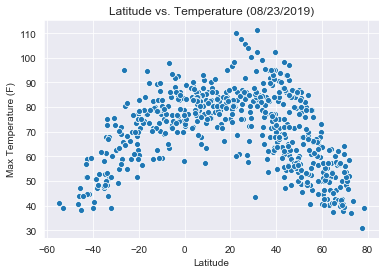

In [40]:
sns.set_style("darkgrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Lat", y="Max Temp",
                     palette=cmap,
                     data=weather_data_df)

ax.set(title = 'Latitude vs. Temperature (08/23/2019)',xlabel='Latitude', ylabel='Max Temperature (F)')

plt.savefig('output_data/LatitudeVsTemp')

#### Latitude vs. Humidity Plot

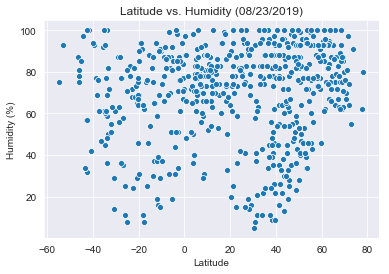

In [37]:
sns.set_style("darkgrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Lat", y="Humidity",
                     palette=cmap,
                     data=weather_data_df)

ax.set(title = 'Latitude vs. Humidity (08/23/2019)',xlabel='Latitude', ylabel='Humidity (%)')

plt.savefig('output_data/CityLatitudeVsHumidity')

#### Latitude vs. Cloudiness Plot

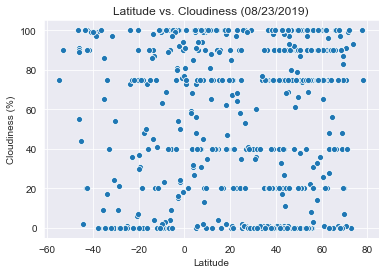

In [38]:
sns.set_style("darkgrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Lat", y="Cloudiness",
                     palette=cmap,
                     data=weather_data_df)

ax.set(title = 'Latitude vs. Cloudiness (08/23/2019)',xlabel='Latitude', ylabel='Cloudiness (%)')

plt.savefig('output_data/CityLatitudeVsCloudiness')

#### Latitude vs. Wind Speed Plot

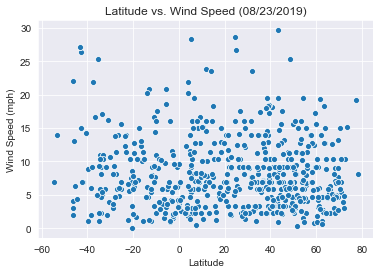

In [39]:
sns.set_style("darkgrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Lat", y="Wind Speed",
                     palette=cmap,
                     data=weather_data_df)

ax.set(title = 'Latitude vs. Wind Speed (08/23/2019)',xlabel='Latitude', ylabel='Wind Speed (mph)')

plt.savefig('output_data/CityLatitudeVsWindSpeed')

#### Three observable trends based on the data
1. According to the Latitude vs. Temperature scatter plot, it does appear to be hotter closer to the equator. 
2. There is no apparent correlation between cloudiness and latidude. 
3. The highest wind speed are further away from the equator / the north and south poles. 